In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/onlinefraud data/onlinefraud.csv')

df.drop('isFlaggedFraud', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.3+ MB


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
df.shape

(56203, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,56203.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000
mean,7.624451,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779
std,1.999414,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,56203.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000
mean,7.624451,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779
std,1.999414,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,1
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.nameOrig.value_counts()

,count
nameOrig,
C1231006815,1
C1033092273,1
C1285923879,1
C1156040280,1
C1789123859,1
...,...
C1709988478,1
C728006761,1
C58176912,1


In [ ]:
df.nameDest.value_counts()

,count
nameDest,
C985934102,75
C1286084959,68
C1590550415,64
C2083562754,62
C248609774,61
...,...
M1476130606,1
M1496566113,1
M1726319669,1


In [ ]:
df.type.value_counts()

,count
type,
PAYMENT,24242
CASH_OUT,15672
CASH_IN,10321
TRANSFER,5267
DEBIT,700
PAYMEN,1


In [ ]:
df.isFraud.value_counts()

,count
isFraud,
0.0,56102
1.0,100


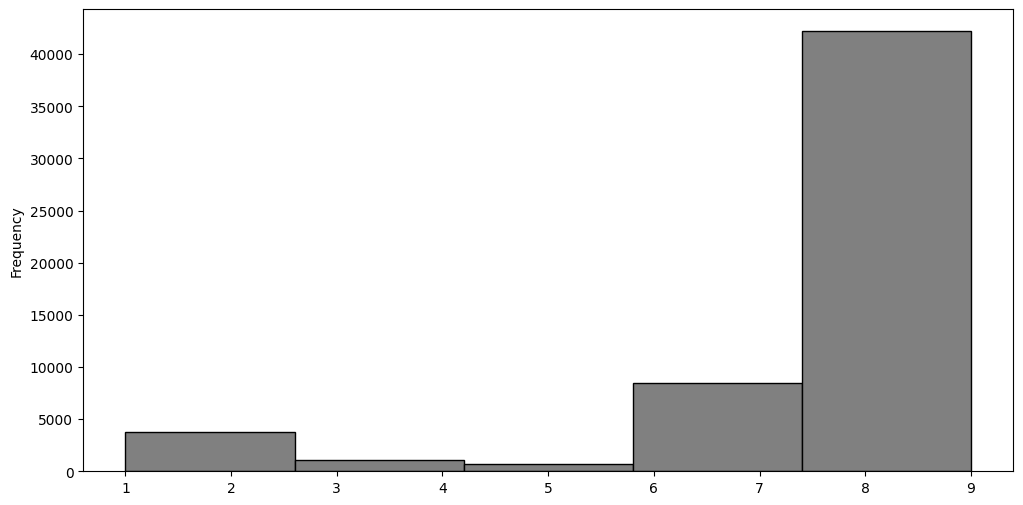

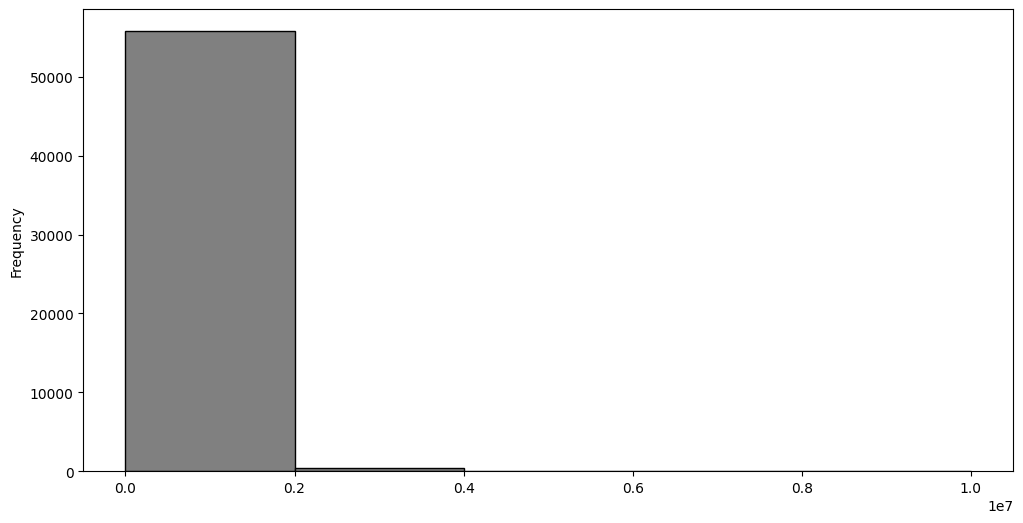

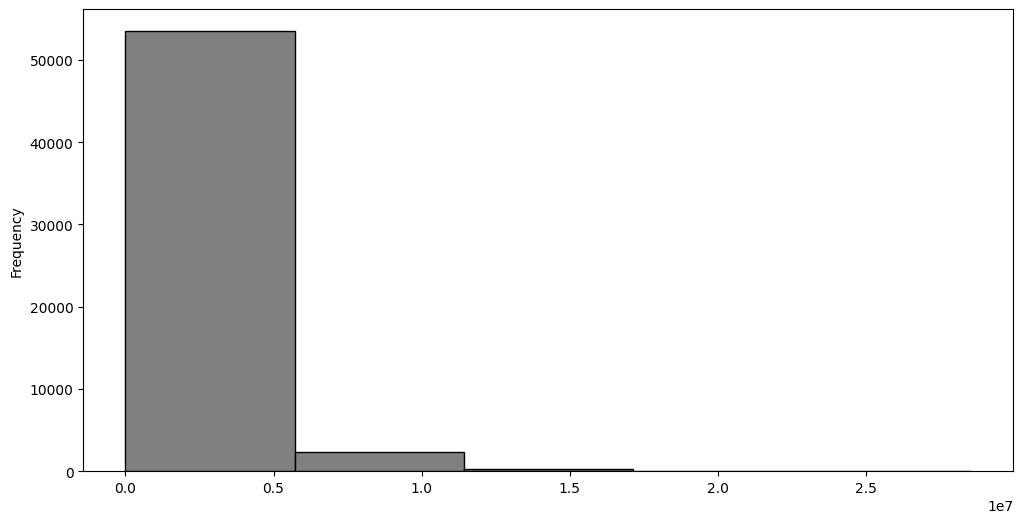

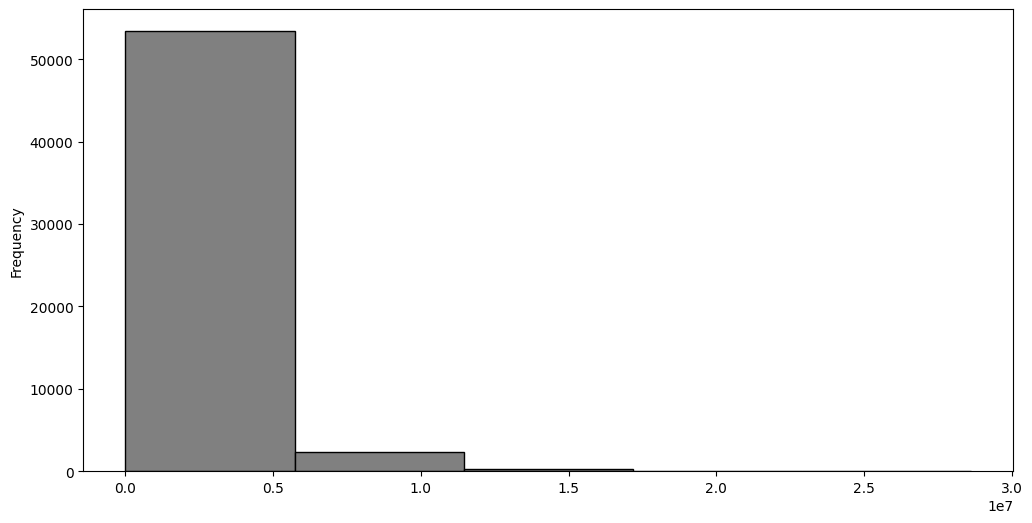

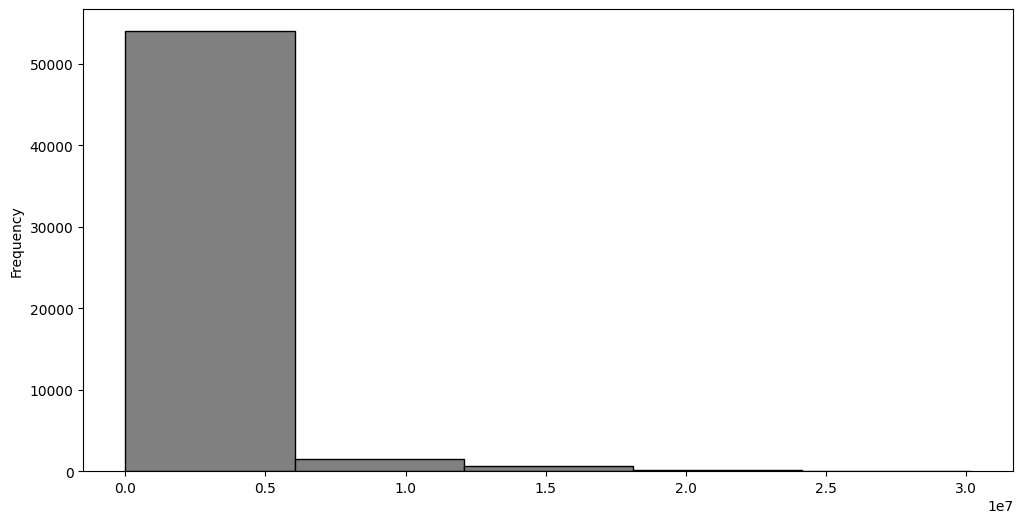

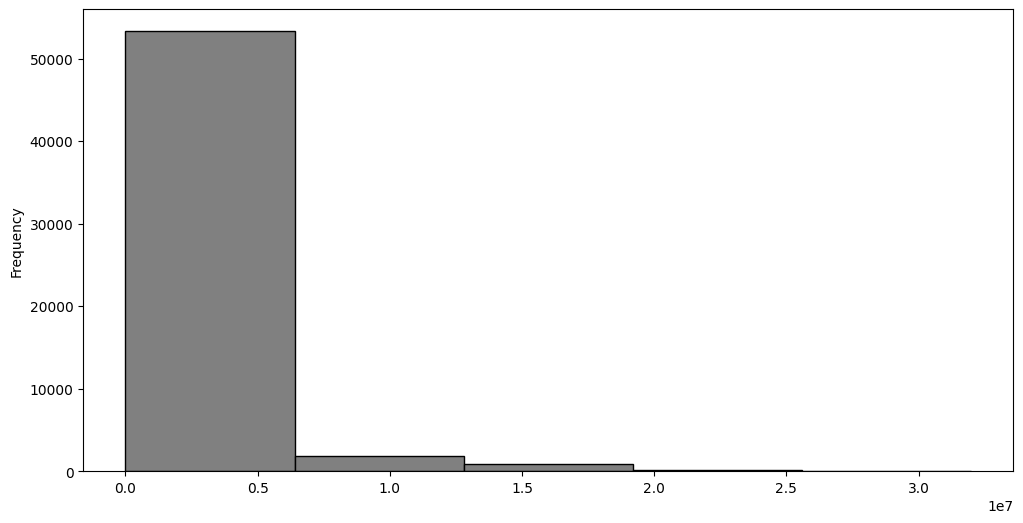

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
2943.463
376452.60000000003


oldbalanceOrg
0.0
2171577.7430000002


newbalanceOrig
0.0
2281225.5900000003


oldbalanceDest
0.0
1993284.0510000014


newbalanceDest
0.0
3357457.94




In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  1.0022655156898448


Feature:  oldbalanceOrg
Skewness value:  2.1070571683997774


Feature:  newbalanceOrig
Skewness value:  2.1114558454322294


Feature:  oldbalanceDest
Skewness value:  1.609171361726472


Feature:  newbalanceDest
Skewness value:  1.5706070490228936




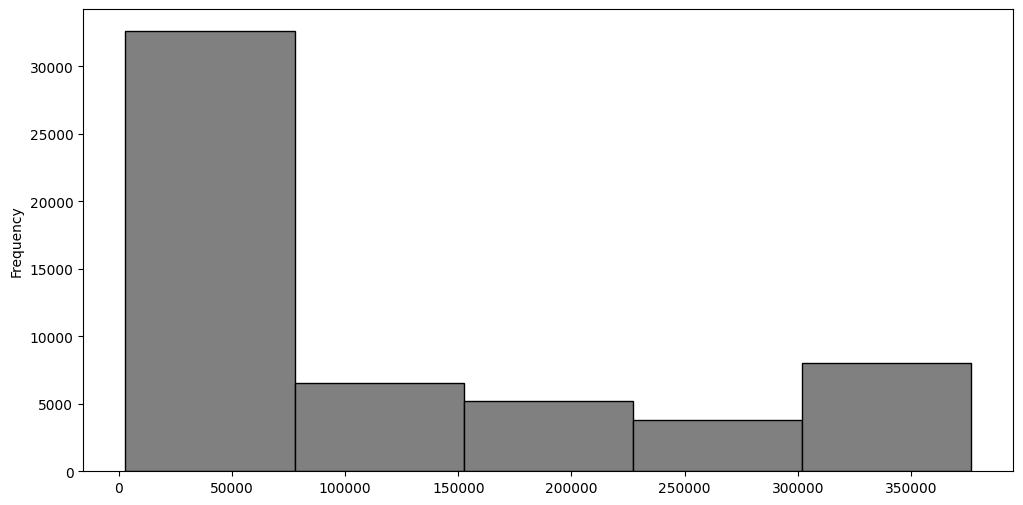

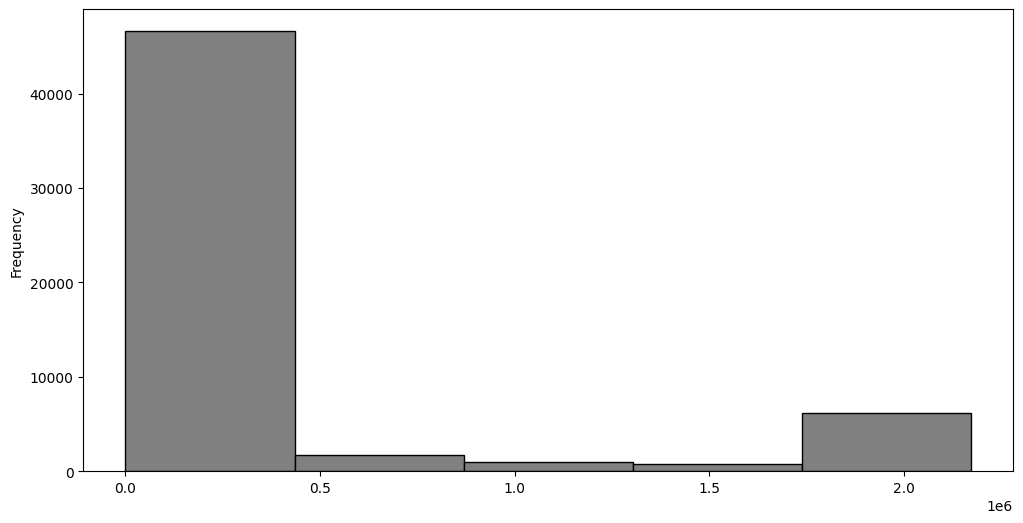

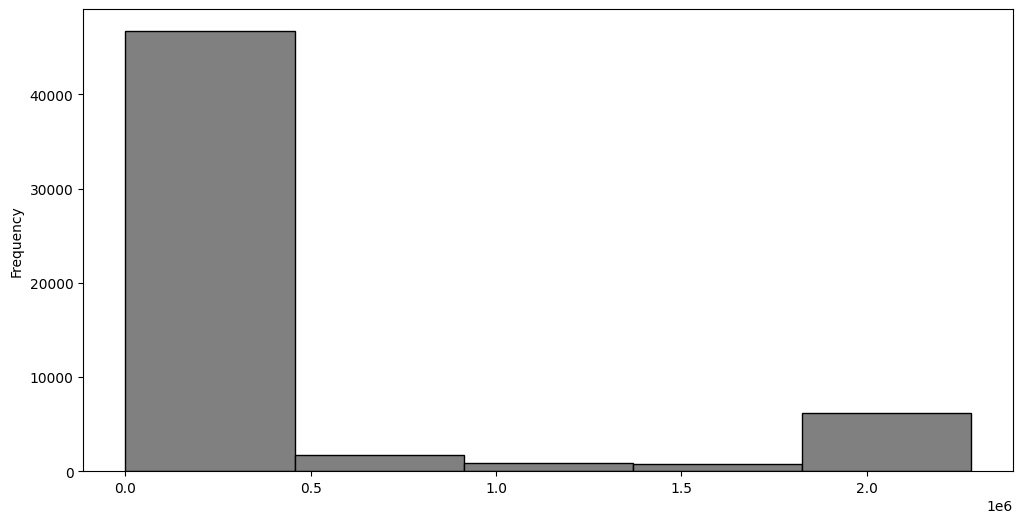

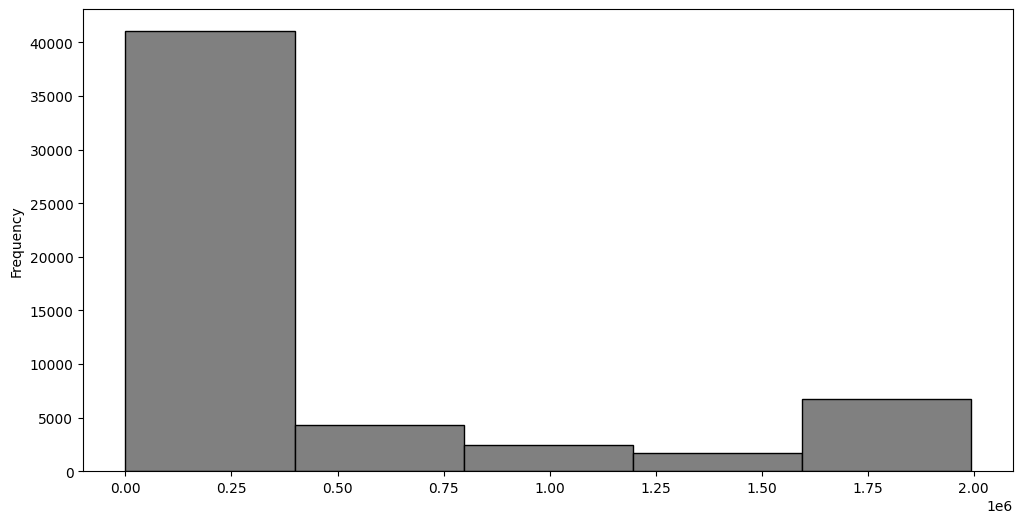

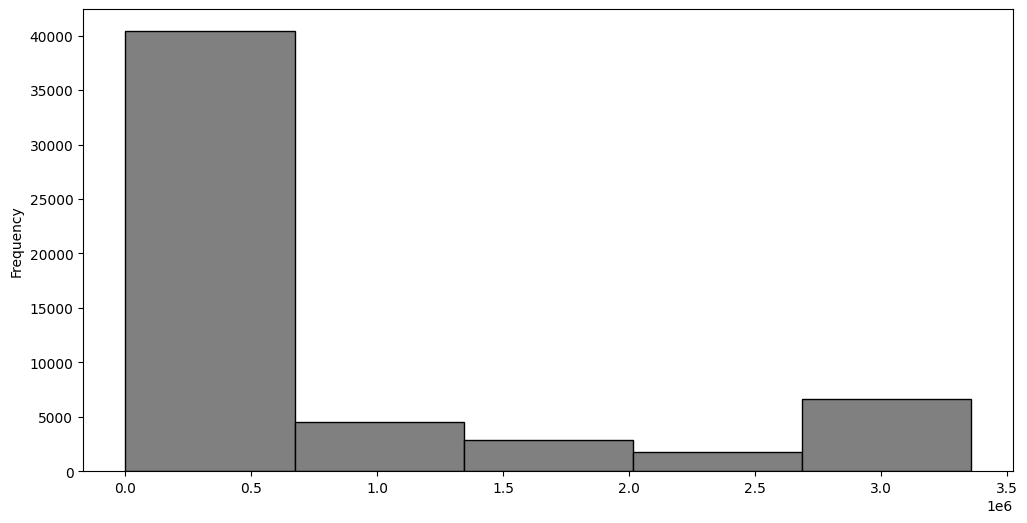

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()


In [ ]:
df.type


,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
56198,CASH_OUT
56199,PAYMENT
56200,CASH_IN
56201,PAYMENT


In [ ]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN', 'PAYMEN'],
      dtype=object)

In [ ]:
payment = df.type.value_counts()
payment

,count
type,
PAYMENT,24242
CASH_OUT,15672
CASH_IN,10321
TRANSFER,5267
DEBIT,700
PAYMEN,1


<Axes: ylabel='type'>

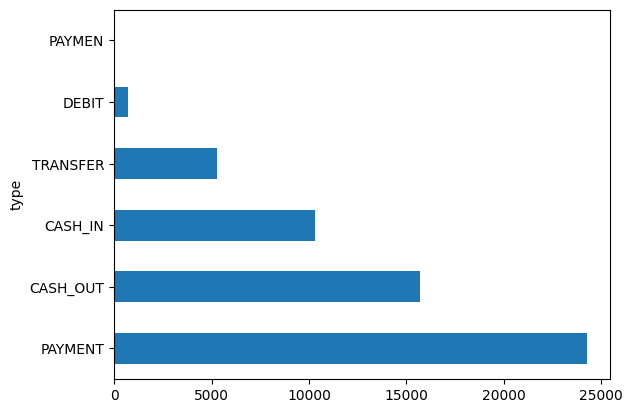

In [ ]:
payment.plot(kind='barh')

<Axes: xlabel='type', ylabel='count'>

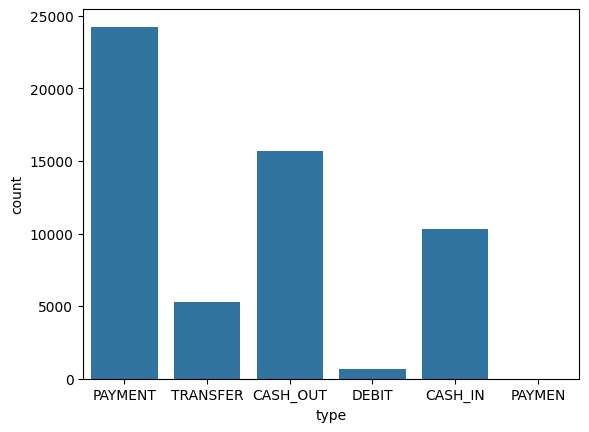

In [ ]:
sns.countplot(x='type', data=df)

In [ ]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult


isFraud,0.0,1.0
type,,
CASH_IN,10321,0
CASH_OUT,15621,51
DEBIT,700,0
PAYMENT,24242,0
TRANSFER,5218,49


Text(0.5, 1.0, 'Distribution of transaction amount')

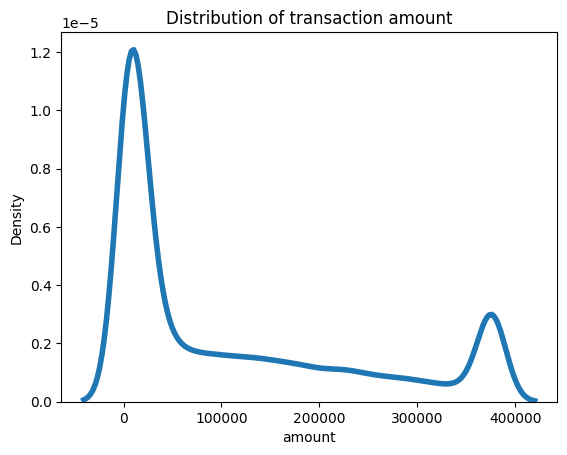

In [ ]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
df.sample(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4046,3,CASH_OUT,48267.200,C1877317084,20023.710,0.00,C40075281,63728.760,111995.96,0.0
46483,9,CASH_OUT,126702.910,C1676349345,5557.000,0.00,C54822654,124955.510,1117123.80,0.0
11471,7,CASH_IN,296234.420,C2058762516,2171577.743,2281225.59,C465257140,1159171.160,1761413.49,0.0
18503,8,CASH_OUT,318407.050,C1877856737,0.000,0.00,C1219273867,1993284.051,3357457.94,0.0
54902,9,PAYMENT,11995.900,C308280137,334151.290,322155.39,M673739760,0.000,0.00,0.0
18160,8,CASH_OUT,223589.320,C1471592488,18651.410,0.00,C1065774928,343587.330,1024187.45,0.0
34265,8,CASH_OUT,97537.830,C883992024,14984.000,0.00,C1399657787,0.000,97537.83,0.0
32571,8,CASH_OUT,134621.660,C202061051,136940.680,2319.02,C15445402,1080241.330,583959.45,0.0
14593,8,CASH_OUT,252378.280,C1563122540,0.000,0.00,C1797686173,433614.340,1474093.60,0.0
36472,9,CASH_IN,109502.750,C506935220,347547.000,457049.75,C67789002,287802.290,163788.93,0.0


<Axes: xlabel='type'>

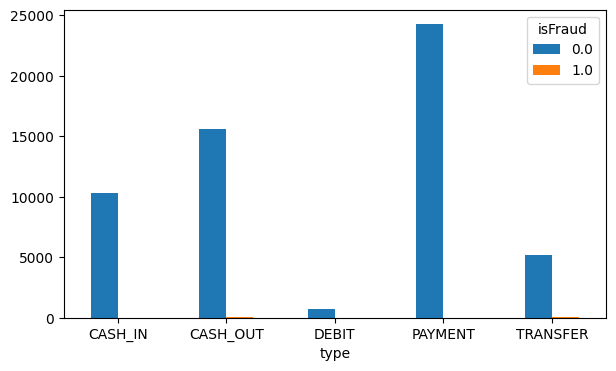

In [ ]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<Axes: xlabel='type'>

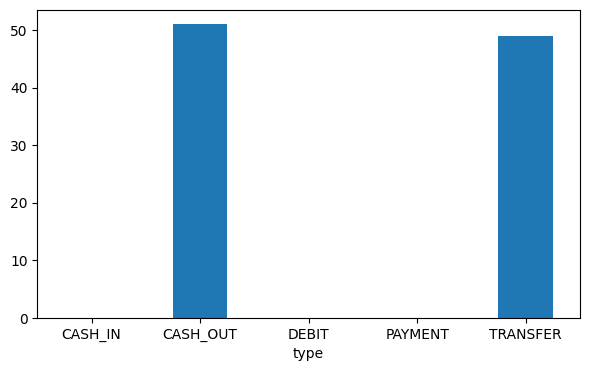

In [ ]:
CrosstabResult[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

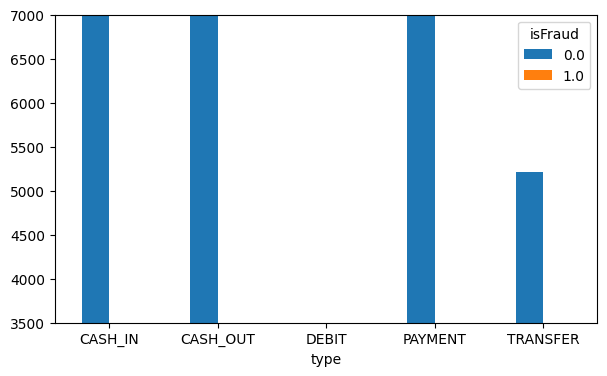

In [ ]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

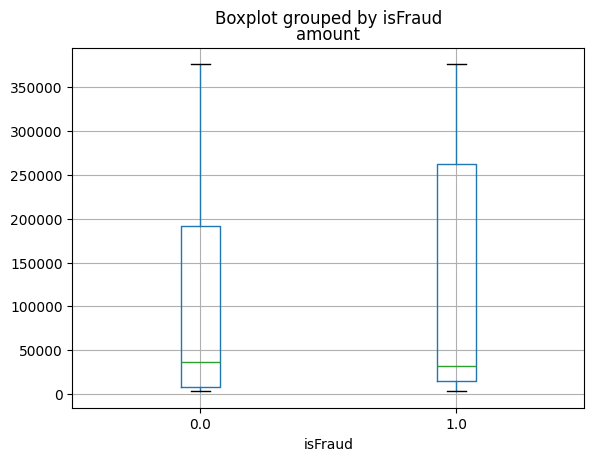

In [ ]:
df.boxplot(column='amount', by='isFraud')


In [ ]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.17792644520755121

In [ ]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))


Total transactions:  56203
Total fraud transactions happened:  100
Total fraud transaction percent:  0.18


In [ ]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
25875,8,TRANSFER,376452.600,C1026280121,0.00,0.0,C277510102,0.0,970749.68,1.0
36026,9,TRANSFER,376452.600,C1769581889,556218.01,0.0,C217441120,0.0,0.00,1.0
3162,2,TRANSFER,376452.600,C1440057381,963532.14,0.0,C268086000,0.0,0.00,1.0
3060,2,CASH_OUT,376452.600,C77163673,1096187.24,0.0,C644345897,0.0,1096187.24,1.0
3059,2,TRANSFER,376452.600,C1093223281,1096187.24,0.0,C2063275841,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...
18772,8,CASH_OUT,2943.463,C1737727444,222.00,0.0,C588779235,24708.0,171647.35,1.0
18771,8,TRANSFER,2943.463,C1961506277,222.00,0.0,C378841819,0.0,267095.19,1.0
12180,7,CASH_OUT,2943.463,C1173659886,164.00,0.0,C1769947269,4068.0,0.00,1.0
12179,7,TRANSFER,2943.463,C1455969984,164.00,0.0,C2119910556,0.0,0.00,1.0


<Axes: ylabel='Frequency'>

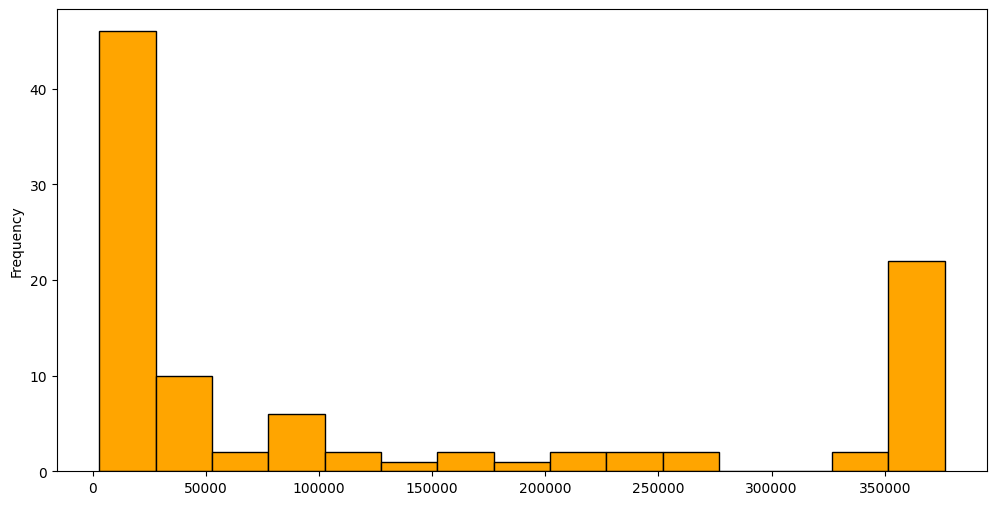

In [ ]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

In [ ]:
fraudster= df.nameDest.value_counts()
fraudster

,count
nameDest,
C985934102,75
C1286084959,68
C1590550415,64
C2083562754,62
C248609774,61
...,...
M1476130606,1
M1496566113,1
M1726319669,1


Text(0.5, 1.0, 'Correlation')

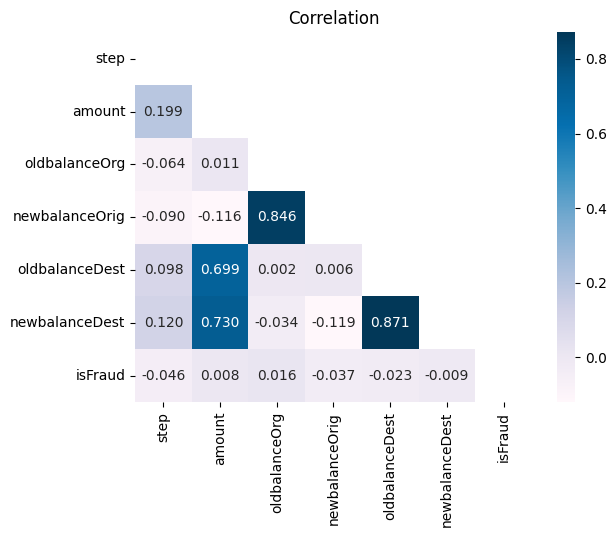

In [ ]:
# Calculate the correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=np.number).corr('spearman')

sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')